# **Movie Rating Prediction**

In [42]:
import pandas as pd # Import pandas for data manipulation and analysis
import numpy as np # Import numpy for numerical operations
import seaborn as sns # Import seaborn for data visualization
import matplotlib.pyplot as plt # Import matplotlib for plotting
from sklearn.model_selection import train_test_split # Import train_test_split for splitting data into training and testing sets
from sklearn.preprocessing import LabelEncoder, StandardScaler # Import LabelEncoder for encoding categorical features and StandardScaler for scaling numerical features
from tensorflow.keras.models import Sequential # Import Sequential for creating a linear stack of layers in a neural network
from tensorflow.keras.layers import Dense # Import Dense for creating fully connected layers in a neural network
from tensorflow.keras.optimizers import Adam # Import Adam optimizer for compiling the neural network model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score # Import metrics for evaluating the regression model

In [43]:
# Load the dataset from a CSV file into a pandas DataFrame
df = pd.read_csv('movie.csv', encoding='latin1')
# Display the entire DataFrame
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
# Display the first 5 rows of the DataFrame to get a preview of the data
print(df.head())

                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3  Siddhant Kapoor  
4    

In [45]:
# Print the dimensions (number of rows and columns) of the DataFrame
df.shape

(15509, 10)

In [46]:
# Print concise summary of the DataFrame, including the index dtype and column dtypes, non-null values and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [47]:
# Calculate and display the number of missing values in each column of the DataFrame
df.isna().sum()

,0
Name,0
Year,528
Duration,8269
Genre,1877
Rating,7590
Votes,7589
Director,525
Actor 1,1617
Actor 2,2384
Actor 3,3144


In [48]:
# Calculate and display the number of duplicate rows in the DataFrame
df.duplicated().sum()

np.int64(6)

In [49]:
# Remove rows with any missing values from the DataFrame
df.dropna(inplace=True)
# Remove duplicate rows from the DataFrame
df.drop_duplicates(inplace=True)

In [50]:
# Print concise summary of the DataFrame after handling missing values and duplicates
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   object 
 2   Duration  5659 non-null   object 
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   object 
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(1), object(9)
memory usage: 486.3+ KB


In [51]:
# Print the dimensions of the DataFrame after handling missing values and duplicates
df.shape

(5659, 10)

In [52]:
# Display the data types of each column in the DataFrame
df.dtypes

,0
Name,object
Year,object
Duration,object
Genre,object
Rating,float64
Votes,object
Director,object
Actor 1,object
Actor 2,object
Actor 3,object


In [53]:
# Clean and convert 'Year' column to integer type
df['Year'] = df['Year'].str.replace(r'\(|\)', '', regex=True).astype(int)
# Clean and convert 'Duration' column to integer type
df['Duration'] = pd.to_numeric(df['Duration'].str.replace(' min', ''))
# Clean and convert 'Votes' column to integer type
df['Votes'] = pd.to_numeric(df['Votes'].str.replace(',', ''))

In [54]:
# Display the data types of each column after cleaning and converting 'Year', 'Duration', and 'Votes'
df.dtypes

,0
Name,object
Year,int64
Duration,int64
Genre,object
Rating,float64
Votes,int64
Director,object
Actor 1,object
Actor 2,object
Actor 3,object


In [55]:
# Print concise summary of the DataFrame after data type conversions
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   int64  
 2   Duration  5659 non-null   int64  
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   int64  
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 486.3+ KB


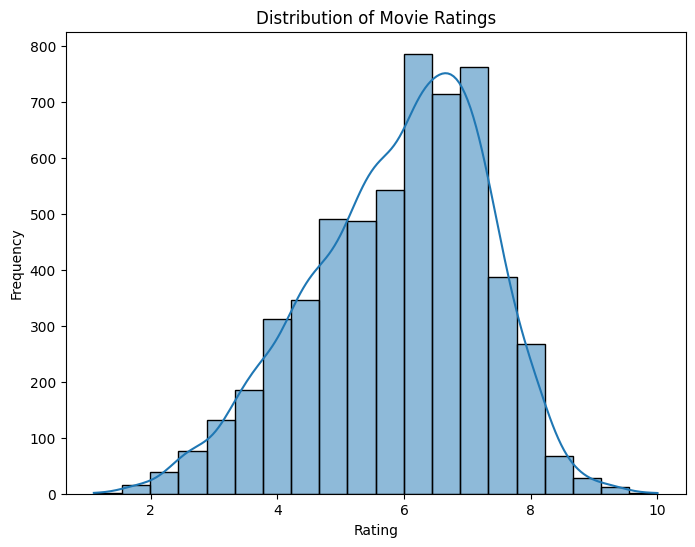

In [56]:
# Create a histogram to visualize the distribution of movie ratings
plt.figure(figsize=(8, 6)) # Set the figure size
sns.histplot(df['Rating'], bins=20, kde=True) # Create histogram with KDE plot
plt.title("Distribution of Movie Ratings") # Set the title of the plot
plt.xlabel("Rating") # Set the label for the x-axis
plt.ylabel("Frequency") # Set the label for the y-axis
plt.show() # Display the plot

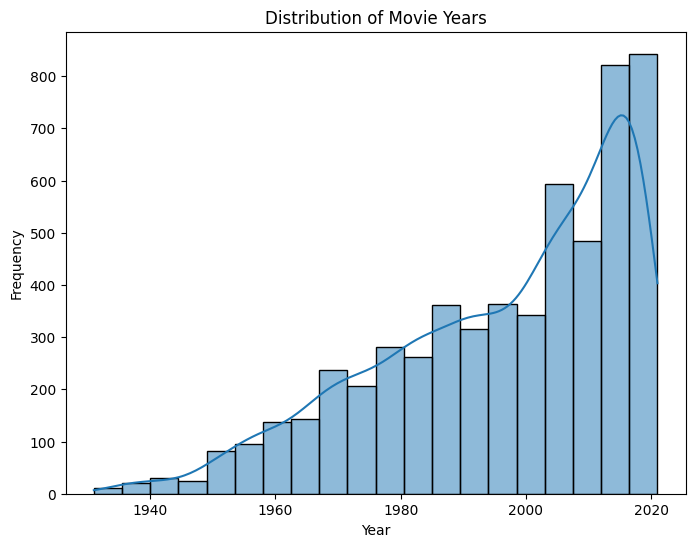

In [57]:
# Create a histogram to visualize the distribution of movie years
plt.figure(figsize=(8, 6)) # Set the figure size
sns.histplot(df['Year'], bins=20, kde=True) # Create histogram with KDE plot
plt.title("Distribution of Movie Years") # Set the title of the plot
plt.xlabel("Year") # Set the label for the x-axis
plt.ylabel("Frequency") # Set the label for the y-axis
plt.show() # Display the plot

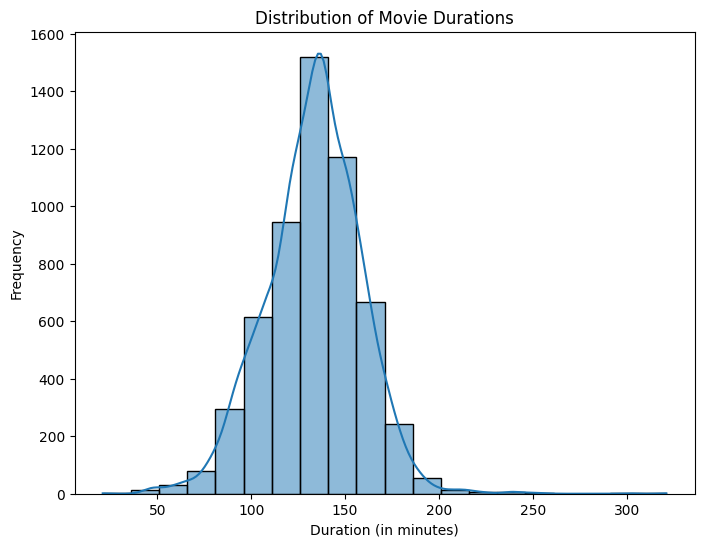

In [58]:
# Create a histogram to visualize the distribution of movie durations
plt.figure(figsize=(8, 6)) # Set the figure size
sns.histplot(df['Duration'], bins=20, kde=True) # Create histogram with KDE plot
plt.title("Distribution of Movie Durations") # Set the title of the plot
plt.xlabel("Duration (in minutes)") # Set the label for the x-axis
plt.ylabel("Frequency") # Set the label for the y-axis
plt.show() # Display the plot

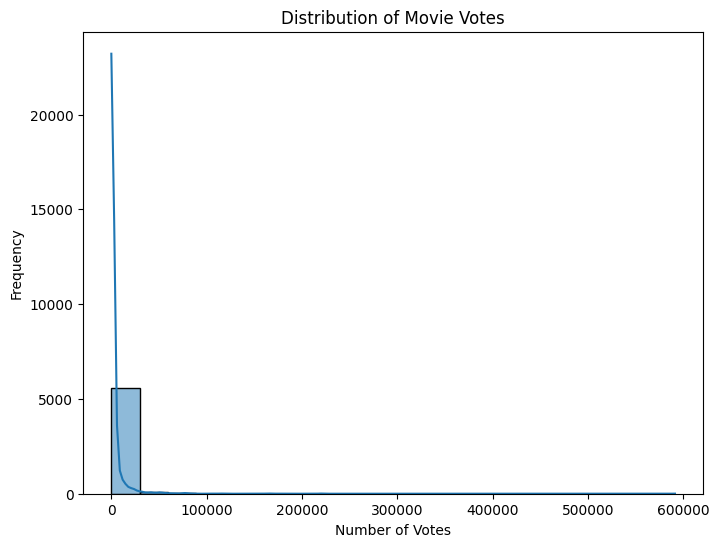

In [59]:
# Create a histogram to visualize the distribution of movie votes
plt.figure(figsize=(8, 6)) # Set the figure size
sns.histplot(df['Votes'], bins=20, kde=True) # Create histogram with KDE plot
plt.title("Distribution of Movie Votes") # Set the title of the plot
plt.xlabel("Number of Votes") # Set the label for the x-axis
plt.ylabel("Frequency") # Set the label for the y-axis
plt.show() # Display the plot

In [60]:
# Drop the 'ID' and 'Name' columns from the DataFrame as they are not needed for the model
df.drop(columns=["ID", "Name"], errors="ignore", inplace=True)

In [61]:
# Extract numerical duration from string and convert to numeric, fill missing with median
df["Duration"] = df["Duration"].astype(str).str.extract(r"(\d+)").astype(float)
df["Duration"].fillna(df["Duration"].median(), inplace=True)

# Convert 'Year' to numeric and fill missing with median
df["Year"] = pd.to_numeric(df["Year"], errors="coerce")
df["Year"].fillna(df["Year"].median(), inplace=True)

# Convert 'Votes' to numeric and fill missing with median
df["Votes"] = pd.to_numeric(df["Votes"], errors="coerce")
df["Votes"].fillna(df["Votes"].median(), inplace=True)

/tmp/ipython-input-3355384812.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Duration"].fillna(df["Duration"].median(), inplace=True)
/tmp/ipython-input-3355384812.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [62]:
# Initialize a dictionary to store label encoders for categorical columns
label_encoders = {}
# Define the list of categorical columns to be encoded
categorical_columns = ["Genre", "Director", "Actor 1", "Actor 2", "Actor 3"]

# Iterate through each categorical column
for col in categorical_columns:
    # Convert the column to string type to handle potential non-string values
    df[col] = df[col].astype(str)
    # Initialize a LabelEncoder for the current column and store it in the dictionary
    label_encoders[col] = LabelEncoder()
    # Fit the encoder to the column's unique values and transform the column to numerical labels
    df[col] = label_encoders[col].fit_transform(df[col])

In [63]:
# Define the features (X) by dropping the target variable 'Rating'
X = df.drop(columns=["Rating"])
# Define the target variable (y) as the 'Rating' column, ensuring it's numeric
y = pd.to_numeric(df["Rating"], errors="coerce")
# Fill any missing values in the target variable with the median of the existing values
y.fillna(y.median(), inplace=True)

In [64]:
# Split the data into training and testing sets
# X_train, X_test: features for training and testing
# y_train, y_test: target variable for training and testing
# test_size=0.2: allocate 20% of the data to the testing set
# random_state=42: set a seed for reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
from sklearn.preprocessing import StandardScaler # Import StandardScaler for feature scaling
# Initialize the StandardScaler
scaler = StandardScaler()
# Fit the scaler to the training data and transform the training data
X_train = scaler.fit_transform(X_train)
# Transform the testing data using the scaler fitted on the training data
X_test = scaler.transform(X_test)

In [66]:
# Check for NaN values in the testing features and target variable
print("NaN values in X_test:", np.isnan(X_test).sum())
print("NaN values in y_test:", np.isnan(y_test).sum())
# Check for infinite values in the testing features and target variable
print("Inf values in X_test:", np.isinf(X_test).sum())
print("Inf values in y_test:", np.isinf(y_test).sum())

NaN values in X_test: 0
NaN values in y_test: 0
Inf values in X_test: 0
Inf values in y_test: 0


In [67]:
# Replace any NaN or infinite values in the testing features and target variable with zeros
X_test = np.nan_to_num(X_test)
y_test = np.nan_to_num(y_test)

In [68]:
# Create a boolean mask to identify rows in X_test that contain any NaN values
mask = np.isnan(X_test).any(axis=1)
# Filter X_test and y_test to remove rows corresponding to the identified NaN values
X_test = X_test[~mask]
y_test = y_test[~mask]

In [69]:
# Verify that there are no NaN values remaining in the filtered X_test
print("Final X_test NaN count:", np.isnan(X_test).sum())

Final X_test NaN count: 0


In [70]:
# Define the neural network model using Sequential API
model = Sequential([
    # Add a dense layer with 64 units and ReLU activation, specifying the input shape
    Dense(64, activation="relu", input_shape=(X_train.shape[1],)),
    # Add another dense layer with 32 units and ReLU activation
    Dense(32, activation="relu"),
    # Add the output dense layer with 1 unit and linear activation for regression
    Dense(1, activation="linear")  # Linear activation for regression
])

# Compile the model
# Use Adam optimizer with a learning rate of 0.001
# Use Mean Squared Error (MSE) as the loss function for regression
# Use Mean Absolute Error (MAE) as an evaluation metric
model.compile(optimizer=Adam(learning_rate=0.001), loss="mean_squared_error", metrics=["mae"])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [71]:
# Train the neural network model
# X_train, y_train: training data
# epochs=50: train for 50 epochs
# batch_size=16: update weights after every 16 samples
# validation_data=(X_test, y_test): evaluate the model on the test data after each epoch
# verbose=1: display training progress
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=1)

Epoch 1/50
283/283 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 14.5975 - mae: 3.1637 - val_loss: 2.4134 - val_mae: 1.2448
Epoch 2/50
283/283 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.3858 - mae: 1.2101 - val_loss: 2.0783 - val_mae: 1.1405
Epoch 3/50
283/283 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.0213 - mae: 1.1221 - val_loss: 1.8791 - val_mae: 1.0976
Epoch 4/50
283/283 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.8764 - mae: 1.0803 - val_loss: 1.7356 - val_mae: 1.0512
Epoch 5/50
283/283 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.7764 - mae: 1.0458 - val_loss: 1.6547 - val_mae: 1.0192
Epoch 6/50
283/283 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6750 - mae: 1.0066 - val_loss: 1.5836 - val_mae: 1.0103
Epoch 7/50
283/283 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5992 - mae: 0.9969 - val_loss: 1.5324 - val_mae: 0.9890
Epoch 8/50
283/283 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5479 - mae: 0.9659 - val_loss: 1.4954 - val_mae: 0.9686
Epoch 9/50
283/283 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - l

In [72]:
# Make predictions on the test data using the trained model
y_pred = model.predict(X_test).flatten() # Flatten the predictions to a 1D array

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [73]:
# Calculate evaluation metrics for the regression model
mae = mean_absolute_error(y_test, y_pred) # Mean Absolute Error
mse = mean_squared_error(y_test, y_pred) # Mean Squared Error
rmse = np.sqrt(mse) # Root Mean Squared Error
r2 = r2_score(y_test, y_pred) # R-squared score

# Print the calculated evaluation metrics
print(f"MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}, R² Score: {r2:.2f}")

MAE: 0.94, MSE: 1.47, RMSE: 1.21, R² Score: 0.21


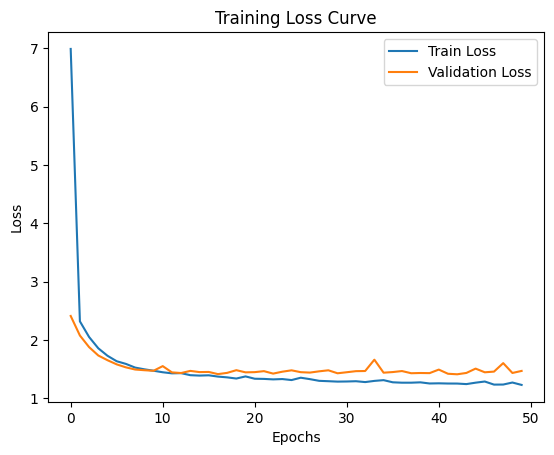

In [74]:
# Plot the training and validation loss over epochs
plt.plot(history.history["loss"], label="Train Loss") # Plot training loss
plt.plot(history.history["val_loss"], label="Validation Loss") # Plot validation loss
plt.xlabel("Epochs") # Set x-axis label
plt.ylabel("Loss") # Set y-axis label
plt.legend() # Display the legend
plt.title("Training Loss Curve") # Set the title of the plot
plt.show() # Display the plot

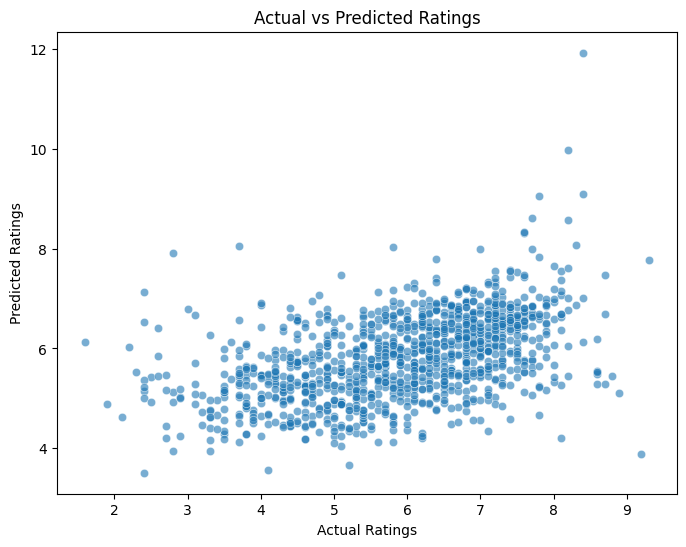

In [75]:
# Create a scatter plot to visualize the relationship between actual and predicted ratings
plt.figure(figsize=(8, 6)) # Set the figure size
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6) # Create scatter plot with transparency
plt.xlabel("Actual Ratings") # Set x-axis label
plt.ylabel("Predicted Ratings") # Set y-axis label
plt.title("Actual vs Predicted Ratings") # Set the title of the plot
plt.show() # Display the plot

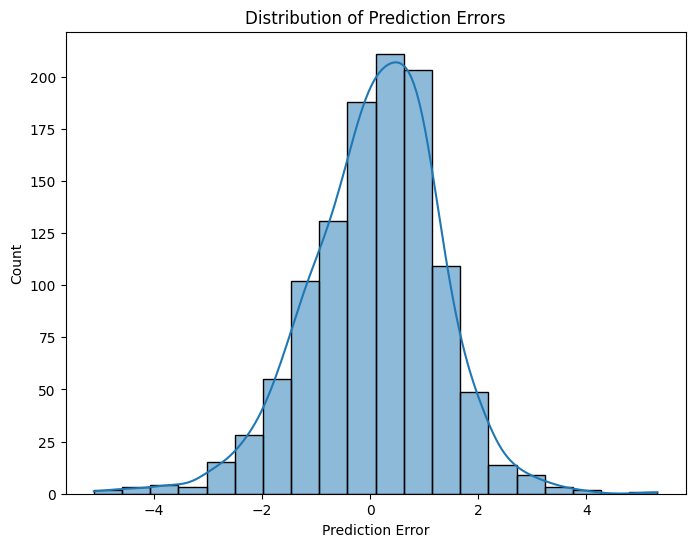

In [76]:
# Calculate the prediction errors (difference between actual and predicted ratings)
errors = y_test - y_pred
# Create a histogram to visualize the distribution of prediction errors
plt.figure(figsize=(8, 6)) # Set the figure size
sns.histplot(errors, bins=20, kde=True) # Create histogram with KDE plot
plt.xlabel("Prediction Error") # Set x-axis label
plt.title("Distribution of Prediction Errors") # Set the title of the plot
plt.show() # Display the plot

In [77]:
# Define a threshold for calculating accuracy (predictions within this range of actual values)
threshold = 0.5
# Calculate accuracy as the percentage of predictions within the defined threshold of actual values
accuracy = np.mean(np.abs(y_test - y_pred) <= threshold)

# Print the calculated accuracy
print(f"Accuracy (within ±{threshold}): {accuracy * 100:.2f}%")

Accuracy (within ±0.5): 32.77%


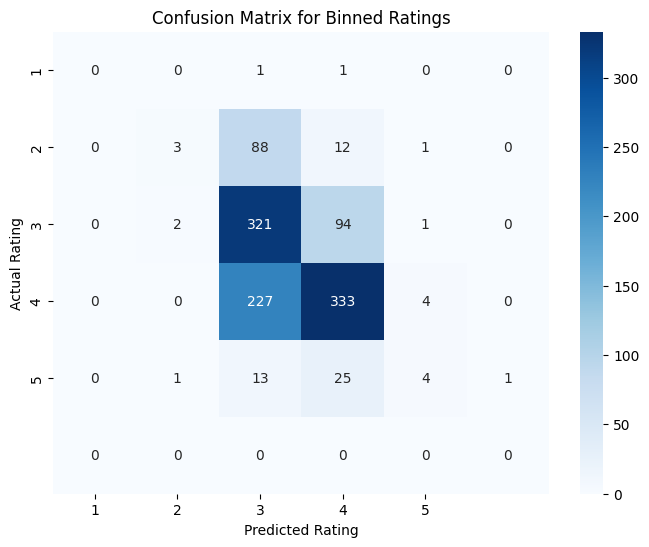

In [78]:
from sklearn.metrics import confusion_matrix # Import confusion_matrix for evaluating classification results
import numpy as np # Import numpy for numerical operations
import seaborn as sns # Import seaborn for data visualization
import matplotlib.pyplot as plt # Import matplotlib for plotting

# Define rating bins for discretizing continuous ratings into categories
bins = [0, 2, 4, 6, 8, 10]
# Define labels for each bin
labels = [1, 2, 3, 4, 5]

# Discretize the actual and predicted ratings into the defined bins
y_test_binned = np.digitize(y_test, bins)
y_pred_binned = np.digitize(y_pred.flatten(), bins)

# Generate the confusion matrix to compare actual and predicted binned ratings
cm = confusion_matrix(y_test_binned, y_pred_binned)

# Plot the confusion matrix using a heatmap for better visualization
plt.figure(figsize=(8, 6)) # Set the figure size
# Create heatmap with annotations (counts), using Blues colormap, and specified tick labels
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Rating") # Set x-axis label
plt.ylabel("Actual Rating") # Set y-axis label
plt.title("Confusion Matrix for Binned Ratings") # Set the title of the plot
plt.show() # Display the plot

In [79]:
import numpy as np # Import numpy for numerical operations
import pandas as pd # Import pandas for data manipulation

# Example input data for prediction (replace with actual values when making predictions)
input_data = {
    "Genre": ["Action"],
    "Director": ["John Doe"],
    "Actor 1": ["Actor A"],
    "Actor 2": ["Actor B"],
    "Actor 3": ["Actor C"],
    "Year": [2020],
    "Duration": [120],
    "Votes": [150000]
}

# Convert the input data dictionary into a pandas DataFrame
input_df = pd.DataFrame(input_data)

# Assuming 'X.columns' holds the column names (feature order) from the training data
# Ensure the input data DataFrame has the same column order as the training data
feature_columns = X.columns
input_df = input_df[feature_columns]

# Function to handle unseen labels during encoding
def encode_with_unseen_handling(input_series, label_encoders, column_name):
    """Encode categorical feature with unseen label handling."""
    # Check if an encoder exists for the given column name
    if column_name in label_encoders:
        encoder = label_encoders[column_name]
        # Attempt to transform the input series using the fitted encoder
        try:
            return encoder.transform(input_series)
        except ValueError:
            # If a ValueError occurs (due to unseen labels), handle it
            # This fallback assigns the encoding of the most frequent label from the training data
            # You might want to adjust this fallback based on your specific needs (e.g., assign a default value)
            return encoder.transform([encoder.classes_[0]] * len(input_series))
    else:
        # Raise an error if no encoder is found for the column
        raise ValueError(f"Encoder for {column_name} not found in label_encoders.")

# Define the list of categorical columns that need to be encoded
categorical_columns = ["Genre", "Director", "Actor 1", "Actor 2", "Actor 3"]

# Iterate through each categorical column in the input DataFrame
for col in categorical_columns:
    # Apply the encoding function with unseen label handling
    input_df[col] = encode_with_unseen_handling(input_df[col], label_encoders, col)

# Scale the input features using the same scaler that was fitted on the training data
input_scaled = scaler.transform(input_df)

# Make the prediction using the trained model on the scaled input data
predicted_rating = model.predict(input_scaled)

# Display the predicted rating, formatted to two decimal places
print(f"Predicted Rating: {predicted_rating[0][0]:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Predicted Rating: 7.48
